# 01. Exploratory Data Analysis

In [2]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import utils

### Load processed training dataset

In [7]:
training_set = pd.read_parquet("datasets/processed/training_set_processed.parquet")
training_set

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Goals
7102,00-01,CHN1,2000-03-19,Dalian Haichang,Beijing Guoan,2,0,2,W,2
7103,00-01,CHN1,2000-03-19,Qingdao,Shanghai Greenland,1,1,0,D,2
7108,00-01,CHN1,2000-03-19,Xiamen Xiaxin,Liaoning,3,0,3,W,3
7106,00-01,CHN1,2000-03-19,Shenzhen FC,Sichuan Guancheng,0,0,0,D,0
7105,00-01,CHN1,2000-03-19,Guangzhou Rich and Force,Chongqing Lifan,0,0,0,D,0
...,...,...,...,...,...,...,...,...,...,...
299041,22-23,TUN1,2023-02-08,EO Sidi Bouzid,ES Metlaoui,3,4,-1,L,7
299040,22-23,TUN1,2023-02-08,ES Sahel,CA Bizertin,0,2,-2,L,2
299039,22-23,TUN1,2023-02-08,US Ben Guerdane,Soliman,2,2,0,D,4
299037,22-23,TUN1,2023-02-08,Stade Tunisien,US Tataouine,2,1,1,W,3


### Seasons analysis

In [3]:
STATS_COLUMNS = ["Sea", "HS", "AS", "GD", "Goals"]
# Statistics per season
df_by_season = training_set[STATS_COLUMNS].groupby("Sea").sum()
df_by_season["Games"] = training_set.groupby("Sea").size()
df_by_season

,HS,AS,GD,Goals,Games
Sea,,,,,
00-01,12783,9117,3666,21900,8186
01-02,12956,9360,3596,22316,8380
02-03,13486,10017,3469,23503,8886
03-04,14481,10605,3876,25086,9520
04-05,16063,11779,4284,27842,10670
05-06,16567,12420,4147,28987,11336
06-07,17449,13009,4440,30458,12014
07-08,18677,13756,4921,32433,12603
08-09,19789,14651,5138,34440,13421


,HS,AS,GD,Goals,Games
Sea,,,,,
00-01,12783,9117,3666,21900,8186
01-02,12956,9360,3596,22316,8380
02-03,13486,10017,3469,23503,8886
03-04,14481,10605,3876,25086,9520
04-05,16063,11779,4284,27842,10670
05-06,16567,12420,4147,28987,11336
06-07,17449,13009,4440,30458,12014
07-08,18677,13756,4921,32433,12603
08-09,19789,14651,5138,34440,13421


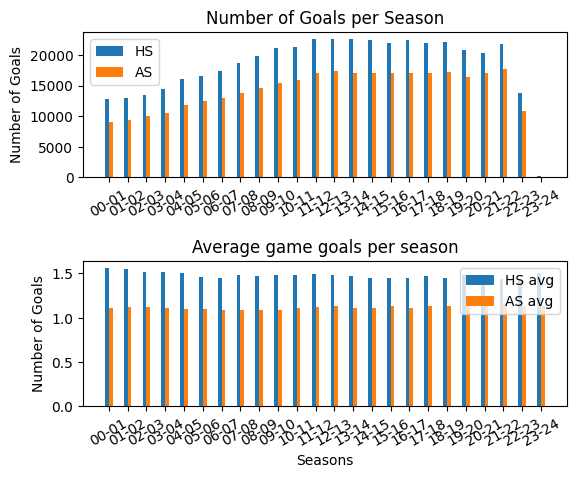

In [4]:
df_by_season = utils.seasons_analysis()
df_by_season

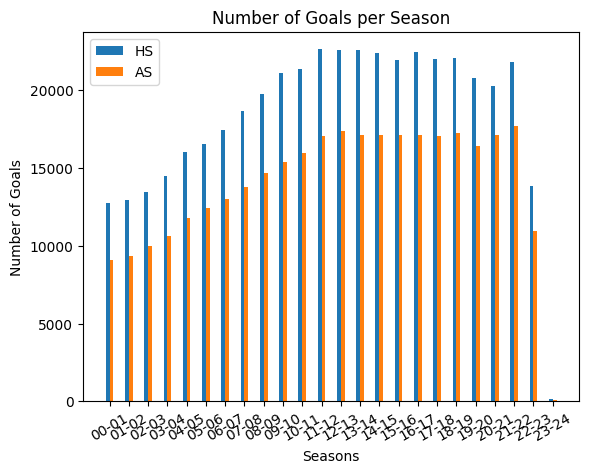

In [5]:
seasons = df_by_season.index.tolist()
X_axis = np.arange(len(seasons))

plt.bar(X_axis - 0.1, df_by_season["HS"].to_list(), 0.2, label='HS')
plt.bar(X_axis + 0.1, df_by_season["AS"].to_list(), 0.2, label='AS')
  
plt.xticks(X_axis, seasons, rotation=30)
plt.xlabel("Seasons")
plt.ylabel("Number of Goals")
plt.title("Number of Goals per Season")
plt.legend()
plt.savefig("figures/HS_AS_Seasons.png")

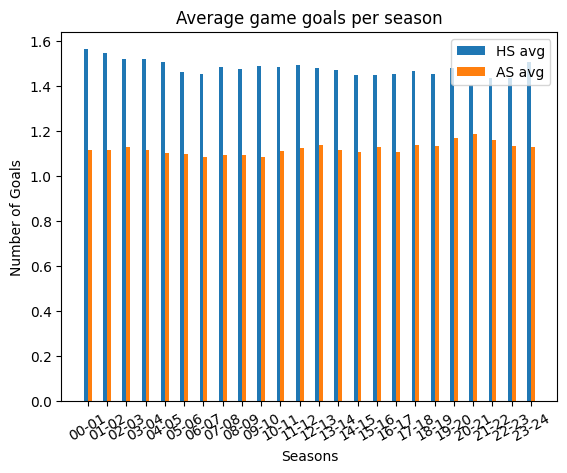

In [6]:
season_games = df_by_season["Games"].tolist()
avg_hs = [i/j for i, j in zip(df_by_season["HS"].to_list(), season_games)]
avg_as = [i/j for i, j in zip(df_by_season["AS"].to_list(), season_games)]
#avg_total = [sum(x) for x in zip(avg_hs, avg_as)]

plt.bar(X_axis - 0.1, avg_hs, 0.2, label = 'HS avg')
plt.bar(X_axis + 0.1, avg_as, 0.2, label = 'AS avg')
#plt.bar(X_axis + 0.2, avg_total, 0.2, label = 'Total avg')
  
plt.xticks(X_axis, seasons, rotation=30)
plt.xlabel("Seasons")
plt.ylabel("Number of Goals")
plt.title("Average game goals per season")
plt.legend()
plt.savefig("figures/AvgHS_AvgAS_Seasons_2.png")

### Seasons with most and least goals

In [7]:
utils.column_stats_by_season(training_set, "HS")

Season with most HS: 11-12 (22626)
Season with least HS: 23-24 (152)


In [8]:
utils.column_stats_by_season(training_set, "AS")

Season with most AS: 21-22 (17704)
Season with least AS: 23-24 (114)


In [9]:
utils.column_stats_by_season(training_set, "Goals")

Season with most Goals: 12-13 (39937)
Season with least Goals: 23-24 (266)


In [10]:
utils.column_stats_by_season(training_set, "Games")

Season with most Games: 14-15 (15472)
Season with least Games: 23-24 (101)


### Win / Draw / Loss analysis

In [11]:
total_matches = training_set.shape[0]
print(f"Number of games in training set: {total_matches}")

# Home wins
home_wins = training_set["WDL"].value_counts()["W"]
home_wins_percentage = round(100 * home_wins / total_matches, 3)
print(f"Number of home wins: {home_wins} ({home_wins_percentage} %)")

# Draws
draws = training_set["WDL"].value_counts()["D"]
draws_percentage = round(100 * draws / total_matches, 3)
print(f"Number of draws: {draws} ({draws_percentage} %)")

# Away wins
away_wins = training_set["WDL"].value_counts()["L"]
away_wins_percentage = round(100 * away_wins / total_matches, 3)
print(f"Number of away wins: {away_wins} ({away_wins_percentage} %)")

Number of games in training set: 299207
Number of home wins: 134167 (44.841 %)
Number of draws: 80871 (27.028 %)
Number of away wins: 84169 (28.131 %)


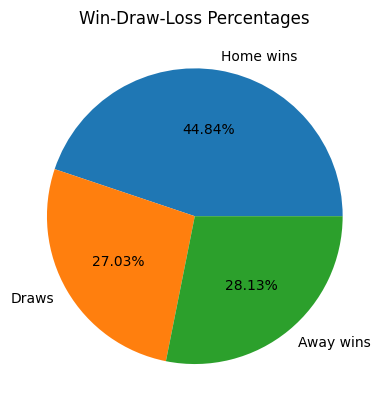

In [12]:
fig, ax = plt.subplots()

labels = "Home wins", "Draws", "Away wins"
ax.pie([home_wins, draws, away_wins], labels=labels, autopct='%1.2f%%');
plt.title("Win-Draw-Loss Percentages")
plt.savefig("figures/WDL_percentages.png")

### Goals analysis

In [13]:
home_goals = training_set["HS"].sum() 
print("Total goals scored by home teams:",home_goals)
away_goals = training_set["AS"].sum()
print("Total goals scored by away teams:",away_goals)
total_goals = training_set['Goals'].sum()
print(f"Total goals in {total_matches} games in training set: {total_goals}")
print(f"Average goals by match: {round(total_goals / total_matches, 3)}")

Total goals scored by home teams: 440343
Total goals scored by away teams: 335543
Total goals in 299207 games in training set: 775886
Average goals by match: 2.593


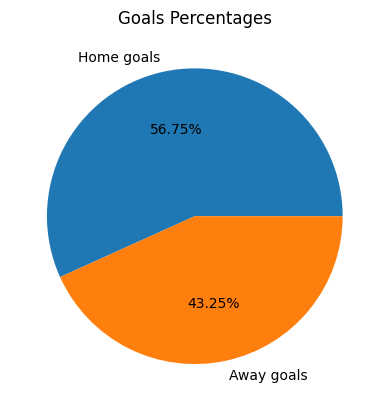

In [14]:
fig, ax = plt.subplots()

labels = "Home goals", "Away goals"
ax.pie([home_goals, away_goals], labels=labels, autopct='%1.2f%%');
plt.title("Goals Percentages")
plt.savefig("figures/Goals_percentages.png")

In [15]:
avg_home_goals = round(training_set["HS"].mean(), 5)
avg_away_goals = round(training_set["AS"].mean(), 5)
avg_goal_difference = round(training_set["GD"].mean(), 5)
print(f"Average goals by home team: {avg_home_goals}")
print(f"Average goals by away team: {avg_away_goals}")
print(f"Average goal difference: {avg_goal_difference}")

Average goals by home team: 1.4717
Average goals by away team: 1.12144
Average goal difference: 0.35026


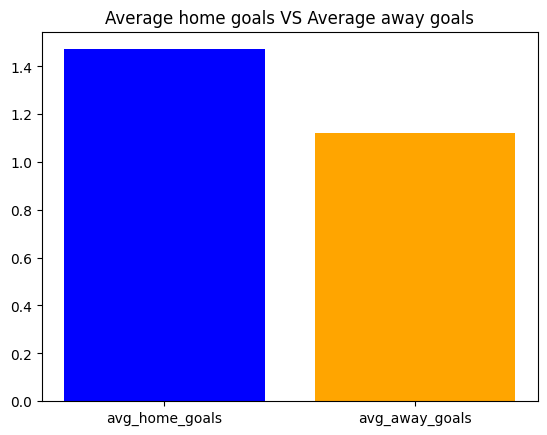

In [16]:
plt.bar(["avg_home_goals", "avg_away_goals"], 
        height=[avg_home_goals, avg_away_goals], color=["blue", "orange"]);
plt.title("Average home goals VS Average away goals");
plt.savefig("figures/AvgHomeGoals_vs_AvgAwayGoals.png")

### Info about training set

In [17]:
utils.get_all_teams(training_set)

Distinct teams in dataset: 1637


['Rouen',
 'Akratitos',
 'Ehime FC',
 'Le Havre',
 'AS Djerba',
 'Yiannina',
 'Feirense',
 'MC Saida',
 'Volga Ulyanovsk',
 'Kalmar FF',
 'Halifax',
 'Olympique de Safi',
 'North Queensland Fury',
 'Hapoel Acre FC',
 'Newcastle United',
 'Charleroi',
 'JSM Bejaia',
 'FK Ural',
 'Schalke 04',
 'Thrasyvoulos',
 'Chiapas FC',
 'Kashima Antlers',
 'Torquay',
 'NAC Breda',
 'Wuhan Zall FC',
 'AFC Eskilstuna',
 'Jaen',
 'Highlands Park',
 'Grimsby',
 'USL Dunkerque',
 'Seongnam FC',
 'MC Alger',
 'Sevilla FC',
 'Union San Felipe',
 'Crystal Palace',
 'CS Sedan',
 'Eupen',
 'Black Leopards',
 'FK Angusht Nazran',
 'VVV Venlo',
 'FC Cincinnati',
 'Eastern Pride',
 'MC Oran',
 'Trofense',
 'ASM Oran',
 'Rapid Wien',
 'Go Ahead Eagles',
 'Hapoel Beer Sheva',
 'Orlando Pirates',
 'Kortrijk',
 'La Serena',
 'Apollon',
 'Shenzhen FC',
 'Angostura',
 'Nublense',
 'CA Bizertin',
 'RW Ahlen',
 'Volos NFC',
 'Kickers Offenbach',
 'Real Monarchs SLC',
 'Incheon United',
 'Sarpsborg 08',
 'Joinville Espo

In [19]:
utils.get_leagues(training_set)

Distinct leagues in set: 51


['CHN1',
 'RUS1',
 'SWE1',
 'AUT1',
 'CHE1',
 'DNK1',
 'FRA1',
 'FRA2',
 'SCO1',
 'ARG1',
 'SCO3',
 'SCO4',
 'SCO2',
 'GER1',
 'ENG3',
 'BEL1',
 'ENG2',
 'ENG4',
 'POR1',
 'HOL1',
 'ENG1',
 'ITA2',
 'SPA2',
 'SPA1',
 'GRE1',
 'ITA1',
 'AUS1',
 'GER2',
 'MEX1',
 'FIN1',
 'ISR1',
 'CHL1',
 'JPN1',
 'KOR1',
 'BRA1',
 'ZAF1',
 'ENG5',
 'DZA1',
 'TUN1',
 'MAR1',
 'NZL1',
 'ECU1',
 'VEN1',
 'USA1',
 'NOR1',
 'GER3',
 'RUS2',
 'FRA3',
 'JPN2',
 'USA2',
 'BRA2']

In [20]:
utils.get_teams_in_league(training_set, league="SPA1")

Distinct leagues in set: 51


['Gimnastic Tarragona',
 'Athletic Bilbao',
 'Villarreal',
 'Zaragoza',
 'Almeria',
 'Valladolid',
 'Girona',
 'Granada',
 'Levante',
 'Santander',
 'Real Madrid',
 'Albacete',
 'Murcia',
 'Getafe',
 'Xerez',
 'Real Sociedad',
 'Malaga',
 'Cordoba',
 'Osasuna',
 'Elche',
 'Huesca',
 'Mallorca',
 'Celta de Vigo',
 'Real Betis',
 'Sevilla FC',
 'Recreativo',
 'Hercules',
 'La Coruna',
 'Las Palmas',
 'Alaves',
 'Vallecano',
 'Tenerife',
 'Espanyol Barcelona',
 'Sporting Gijon',
 'Cadiz',
 'Numancia',
 'Leganes',
 'Oviedo',
 'Valencia',
 'Eibar',
 'FC Barcelona',
 'Athletico Madrid']

In [21]:
utils.search_H2H(training_set, "Real Madrid", "Eibar")

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Goals
174450,14-15,SPA1,2014-11-22,Eibar,Real Madrid,0,4,-4,L,4
174640,14-15,SPA1,2015-04-11,Real Madrid,Eibar,3,0,3,W,3
189935,15-16,SPA1,2015-11-29,Eibar,Real Madrid,0,2,-2,L,2
190122,15-16,SPA1,2016-04-09,Real Madrid,Eibar,4,0,4,W,4
212361,16-17,SPA1,2016-10-02,Real Madrid,Eibar,1,1,0,D,2
212545,16-17,SPA1,2017-03-04,Eibar,Real Madrid,1,4,-3,L,5
219409,17-18,SPA1,2017-10-22,Real Madrid,Eibar,3,0,3,W,3
219593,17-18,SPA1,2018-03-10,Eibar,Real Madrid,1,2,-1,L,3
224852,18-19,SPA1,2018-11-24,Eibar,Real Madrid,3,0,3,W,3
225032,18-19,SPA1,2019-04-06,Real Madrid,Eibar,2,1,1,W,3


## Frequency: how many goals are needed to score for W/D/L

In [22]:
wins_by_goals = np.zeros(15)
draws_by_goals = np.zeros(15)
losses_by_goals = np.zeros(15)

for game in training_set.itertuples():
    if game.WDL == "W":
        wins_by_goals[game.HS] += 1
        losses_by_goals[game.AS] += 1
    elif game.WDL == "D":
        draws_by_goals[game.HS] += 2
    elif game.WDL == "L":
        losses_by_goals[game.HS] += 1
        wins_by_goals[game.AS] += 1

wins_by_goals = [int(x) for x in wins_by_goals]
draws_by_goals = [int(x) for x in draws_by_goals]
losses_by_goals = [int(x) for x in losses_by_goals]

In [23]:
# Show lists: each N position in list represents N goals scored
print("List of wins by scoring n goals: \n", wins_by_goals)
print("List of draws by scoring n goals: \n",draws_by_goals)
print("List of losses by scoring n goals: \n",losses_by_goals)

List of wins by scoring n goals: 
 [0, 56509, 82717, 50220, 20068, 6286, 1913, 466, 112, 34, 8, 1, 0, 2, 0]
List of draws by scoring n goals: 
 [50726, 74942, 29882, 5560, 586, 42, 4, 0, 0, 0, 0, 0, 0, 0, 0]
List of losses by scoring n goals: 
 [120775, 76444, 18488, 2407, 202, 15, 1, 4, 0, 0, 0, 0, 0, 0, 0]


In [24]:
# Check if it counted games correctly
games_without_draws = training_set[training_set["WDL"] != "D"].shape[0] #without draws, 218336 games
assert sum(wins_by_goals) == sum(losses_by_goals) == games_without_draws, "WL games do not match"
draw_games = training_set[training_set["WDL"] == "D"].shape[0] #only draws
assert sum(draws_by_goals) / 2 == draw_games, "D games do not match"

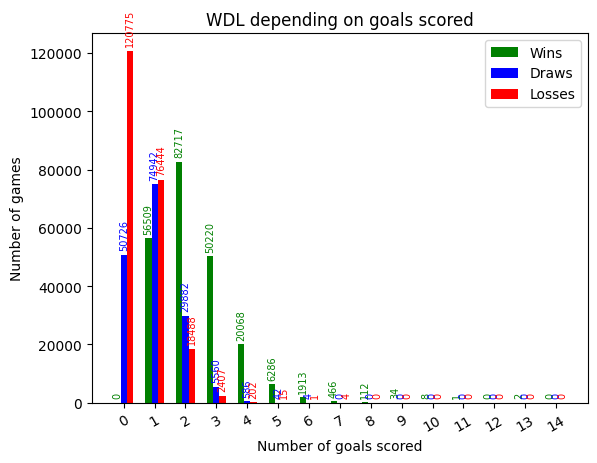

In [25]:
X_axis = np.arange(15)

bar1 = plt.bar(X_axis - 0.2, wins_by_goals, 0.2, label='Wins', color='green')
bar2 = plt.bar(X_axis, draws_by_goals, 0.2, label='Draws', color='blue')
bar3 = plt.bar(X_axis + 0.2, losses_by_goals, 0.2, label='Losses', color='red')
  
plt.xticks(X_axis, list(range(0, 15, 1)), rotation=30)
plt.xlabel("Number of goals scored")
plt.ylabel("Number of games")
plt.title("WDL depending on goals scored")
plt.legend()


for rect in bar1:
    height = rect.get_height() 
    plt.text(rect.get_x() + rect.get_width() / 2.0, height + 1500, f'{height:.0f}', 
                 ha='center', va='bottom', fontsize=7, color="green", rotation=90)
for rect in bar2:
    height = rect.get_height() 
    plt.text(rect.get_x() + rect.get_width() / 2.0, height + 1500, f'{height:.0f}', 
                 ha='center', va='bottom', fontsize=7, color="blue", rotation=90)
for rect in bar3:
    height = rect.get_height() 
    plt.text(rect.get_x() + rect.get_width() / 2.0, height + 1500, f'{height:.0f}', 
                 ha='center', va='bottom', fontsize=7, color="red", rotation=90)

plt.savefig("figures/WDL_by_scored_goals.png")


In [26]:
games_by_goals = [sum(x) for x in zip(wins_by_goals, draws_by_goals, losses_by_goals)]
print("Games by goals scored :", games_by_goals)
percentage_wins_by_goals = [round(100 * x / (y + 0.000001), 2) for x, y in zip(wins_by_goals, games_by_goals)]
percentage_draws_by_goals = [round(100 * x / (y + 0.000001), 2) for x, y in zip(draws_by_goals, games_by_goals)]
percentage_losses_by_goals = [round(100 * x / (y + 0.000001), 2) for x, y in zip(losses_by_goals, games_by_goals)]

def print_percentages_by_goals():
    for i in range(0, 15, 1):
        print(f"If you score {i} goals, you win {wins_by_goals[i]} games ({percentage_wins_by_goals[i]}%), "
              f"draw {draws_by_goals[i]} games ({percentage_draws_by_goals[i]}%) "
              f"and lose {losses_by_goals[i]} games ({percentage_losses_by_goals[i]}%) "
              f"out of a total of {games_by_goals[i]} games. \n")

print_percentages_by_goals()

Games by goals scored : [171501, 207895, 131087, 58187, 20856, 6343, 1918, 470, 112, 34, 8, 1, 0, 2, 0]
If you score 0 goals, you win 0 games (0.0%), draw 50726 games (29.58%) and lose 120775 games (70.42%) out of a total of 171501 games. 

If you score 1 goals, you win 56509 games (27.18%), draw 74942 games (36.05%) and lose 76444 games (36.77%) out of a total of 207895 games. 

If you score 2 goals, you win 82717 games (63.1%), draw 29882 games (22.8%) and lose 18488 games (14.1%) out of a total of 131087 games. 

If you score 3 goals, you win 50220 games (86.31%), draw 5560 games (9.56%) and lose 2407 games (4.14%) out of a total of 58187 games. 

If you score 4 goals, you win 20068 games (96.22%), draw 586 games (2.81%) and lose 202 games (0.97%) out of a total of 20856 games. 

If you score 5 goals, you win 6286 games (99.1%), draw 42 games (0.66%) and lose 15 games (0.24%) out of a total of 6343 games. 

If you score 6 goals, you win 1913 games (99.74%), draw 4 games (0.21%) and 

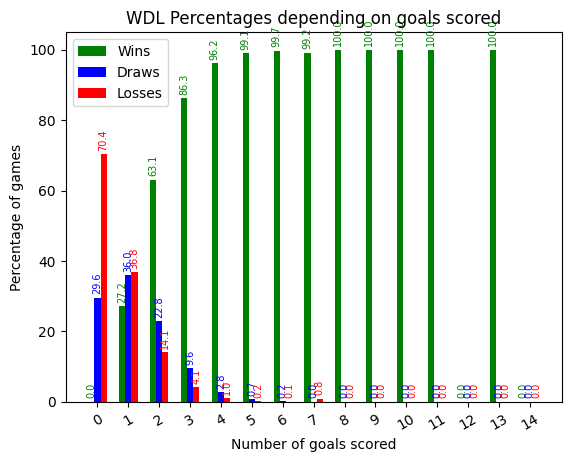

In [27]:
X_axis = np.arange(15)

bar1 = plt.bar(X_axis - 0.2, percentage_wins_by_goals, 0.2, label='Wins', color='green')
bar2 = plt.bar(X_axis, percentage_draws_by_goals, 0.2, label='Draws', color='blue')
bar3 = plt.bar(X_axis + 0.2, percentage_losses_by_goals, 0.2, label='Losses', color='red')
  
plt.xticks(X_axis, list(range(0, 15, 1)), rotation=30)
plt.xlabel("Number of goals scored")
plt.ylabel("Percentage of games")
plt.title("WDL Percentages depending on goals scored")
plt.legend()

for rect in bar1:
    height = rect.get_height() 
    plt.text(rect.get_x() + rect.get_width() / 2.0, height + 1, f'{height:.1f}', 
                 ha='center', va='bottom', fontsize=7, color="green", rotation=90)
for rect in bar2:
    height = rect.get_height() 
    plt.text(rect.get_x() + rect.get_width() / 2.0, height + 1, f'{height:.1f}', 
                 ha='center', va='bottom', fontsize=7, color="blue", rotation=90)
for rect in bar3:
    height = rect.get_height() 
    plt.text(rect.get_x() + rect.get_width() / 2.0, height + 1, f'{height:.1f}', 
                 ha='center', va='bottom', fontsize=7, color="red", rotation=90)

plt.savefig("figures/Percentages_WDL_by_scored_goals.png")

In [9]:
team_last_games, streak, points = utils.get_team_last_matches(training_set, "Real Madrid", n_previous_games=5)
team_last_games

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Goals
298599,22-23,SPA1,2023-01-07,Villarreal,Real Madrid,2,1,1,W,3
298623,22-23,SPA1,2023-01-22,Athletic Bilbao,Real Madrid,0,2,-2,L,2
298633,22-23,SPA1,2023-01-29,Real Madrid,Real Sociedad,0,0,0,D,0
298636,22-23,SPA1,2023-02-02,Real Madrid,Valencia,2,0,2,W,2
298642,22-23,SPA1,2023-02-05,Mallorca,Real Madrid,1,0,1,W,1


In [12]:
print(streak)
points

['L', 'W', 'D', 'W', 'L']


7